In [22]:
from IPython.display import Markdown
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# MICrONS digital twin properties

## Description

The full description in this dataset can be read in the README file displayed below. 

There are 5 major components to this dataset:
```
    1. model readout feature weights and readout locations
    2. performance metrics for the models
    3. orientation and direction tuning
    4. predicted neural responses and the stimuli that generated them
    5. anatomical information for the predicted neurons
```

## Download MICrONS digital twin properties

**IMPORTANT**

By default, the neural responses and stimulus won't be downloaded because of their large size (~30GB). To download them select the appropriate command below.

### Run the download script

In the cell below, run one of the following commands:
        
#### 1. Download to the default location:

```python
!bash /workspace/fnn/scripts/download_microns_digital_twin_properties.sh
```

#### 2. Download to a custom location:
            
```python
!bash /workspace/fnn/scripts/download_microns_digital_twin_properties.sh /your/custom/path
```

#### 3. If you want the neural responses and stimulus:

```python
!bash /workspace/fnn/scripts/download_microns_digital_twin_properties.sh --include-responses
```

#### 4. To use both a custom path and include the responses:

```python
!bash /workspace/fnn/scripts/download_microns_digital_twin_properties.sh /your/custom/path --include-responses
```

### Notes
* The path you specify must be visible from inside the container. By default, `/workspace` is a volume mount that maps to the directory where this repository is cloned on the host machine.

# Specify download directory

In [24]:
data_path = Path('/groups/saalfeld/saalfeldlab/vijay/fnn/data/microns_digital_twin/properties/') 

# Run the download script

In [ ]:
#!bash /workspace/fnn/scripts/download_microns_digital_twin_properties.sh $data_path

Include responses: false
Skipping 'responses' directory...
Download complete.


# Display README

In [25]:
with open(data_path / "README.md", "r") as f:
    content = f.read()

Markdown(content)

This README file describes the `v2` exported properties for the MICrONS digital twin.

# Contents
Properties are located in the following subdirectories:

- readout
- performance
- ori_dir_tuning
- responses
- anatomy


# Subdirectory contents
## readout
This subdirectory contains readout weights and readout locations for the digital twin model units. 
```
    NAME                    SHAPE               ROWS            PROPERTY
    readout_weights.npy     104171 x 512        units           readout_weight_vector
    readout_locations.npy   104171 x 2          units           readout_location_x, readout_location_y
    units.csv               104171 x 3          units           session, scan_idx, unit_id
    metadata.csv            13 x 6              scans           animal_id, session, scan_idx, ...
```
## performance
This subdirectory contains performance metrics for the digital twin model units. 
```
    NAME                    SHAPE               ROWS            PROPERTY
    units.csv               104171 x 6          units           session, scan_idx, unit_id, cc_abs, cc_max, cc_norm
    metadata.csv            13 x 11             scans           animal_id, session, scan_idx, ...
```
## ori_dir_tuning
This subdirectory contains orientation/ direction tuning metrics for the digital twin model units. 

Note: These properties are from a slightly different version of the digital twin that had additional training on oriented stimuli. See methods in [2].
```
    NAME                    SHAPE               ROWS            PROPERTY
    units.csv               104171 x 9          units           session, scan_idx, unit_id, OSI, DSI, gOSI, gDSI, pref_ori, pref_dir
    metadata.csv            13 x 10             scans           animal_id, session, scan_idx, ...
```
## responses
This subdirectory contains computed responses for the digital twin model units and the stimulus used to generate them.
```
    NAME                    SHAPE               ROWS            PROPERTY
    responses.npy           104171 x 75000      units           response
    stimulus.npy            75000 x 144 x 256   frames          image (height x width)
    units.csv               104171 x 3          units           session, scan_idx, unit_id
    metadata.csv            13 x 11             scans           animal_id, session, scan_idx, sampling_frequency, ...
```
## anatomy
This subdirectory contains the anatomical information for the digital twin model units.
```
    NAME                    SHAPE               ROWS            PROPERTY
    units.csv               104171 x 8          units           session, scan_idx, unit_id, unit_x, unit_y, unit_z, brain_area, field
    metadata.csv            13 x 7              scans           animal_id, session, scan_idx, ...
```
# Property descriptions
For more details on each property see methods section of corresponding citation. Citations are listed in the section below.
```
    NAME                    DESCRIPTION                                                                            CITATION
    animal_id               ID of the mouse                                                                        [1 - 3]
    session                 ID of the imaging session                                                              [1 - 3]
    scan_idx                ID of the scan within the imaging session                                              [1 - 3]
    unit_id                 ID of the unit within the scan                                                         [1 - 3]
    readout_weight_vector   Readout weights for the unit learned by digital twin model                             [1, 2]
    readout_location_x      X coordinate of the readout location, an approximation of 
                                receptive field center in stimulus space; (-1, -1) bottom-left, (1, 1) top-right   [1, 2]
    readout_location_y      Y coordinate of the readout location, an approximation of 
                                receptive field center in stimulus space; (-1, -1) bottom-left, (1, 1) top-right   [1, 2]
    cc_abs                  Test set performance of the digital twin model unit, higher is better                  [1, 2]
    cc_max                  Neuron variability score used to normalize digital twin model unit performance         [1, 2]
    cc_norm                 Normalized model unit performance, higher is better                                    [1, 2]
    OSI                     Orientation selectivity index                                                          [2]
    DSI                     Direction selectivity index                                                            [2]
    gOSI                    Global orientation selectivity index                                                   [1, 2]
    gDSI                    Global direction selectivity index                                                     [1, 2]
    pref_ori                Preferred orientation in degrees (0 - 180), vertical bar moving right is 0 and 
                                orientation increases counter-clockwise                                            [1, 2]
    pref_dir                Preferred direction in degrees (0 - 360), vertical bar moving right is 0 and 
                                orientation increases counter-clockwise                                            [1, 2]
    response                Response for each unit to a stimulus frame                                             [1, 2]
    image                   Stimulus image (height x width)                                                        [1, 2]
    sampling_frequency      Frequency used to resample stimulus video shown to model                               [1]
    unit_x                  X-coordinate of unit in cortical space (posterior -> anterior)                         [3]
    unit_y                  Y-coordinate of unit in cortical space (lateral -> medial)                             [3]
    unit_z                  Z-coordinate of unit in cortical space (superficial -> deep)                           [3]
    brain_area              Visual cortical area label                                                             [3]
    field                   ID of the two-photon imaging plane, given animal_id, session, scan_idx                 [3] 
```

# Citations
```
    ID        NAME                                          DOI
    1         Wang et al., 2025                             https://doi.org/10.1038/s41586-025-08829-y
    2         Ding, Fahey, and Papadopoulos et al., 2025    https://doi.org/10.1038/s41586-025-08840-3
    3         MICrONS Consortium et al., 2025               https://doi.org/10.1038/s41586-025-08790-w

For use of the digital twin and any properties please cite [1, 2]
For use of the anatomical properties please cite [3]
```

# Load readout weights and readout location

In [26]:
readout_path = data_path / 'readout'
readout_weights = np.load(readout_path / 'readout_weights.npy')
readout_locations = np.load(readout_path / 'readout_locations.npy')
readout_units_df = pd.read_csv(readout_path / 'units.csv')

The length and order of `readout_weights` and `readout_locations` matches the length and order of the model units in the `readout_units_df` dataframe. 

In [27]:
print(readout_weights.shape[0], readout_locations.shape[0], readout_units_df.shape[0])

104171 104171 104171


You can use the dataframe to subset the readout data:

In [28]:
session = 8
scan_idx = 5
readout_subset_df = readout_units_df.query('session == @session and scan_idx == @scan_idx')
readout_subset_df

,session,scan_idx,unit_id
73272,8,5,1
73273,8,5,2
73274,8,5,3
73275,8,5,4
73276,8,5,5
...,...,...,...
83208,8,5,10570
83209,8,5,10571
83210,8,5,10572
83211,8,5,10574


In [29]:
# subset readout weights
readout_weights[readout_subset_df.index].shape

(9941, 512)

In [30]:
# subset readout locations
readout_locations[readout_subset_df.index].shape

(9941, 2)

# Load model performance metrics

In [31]:
perform_path = data_path / 'performance'
perform_df = pd.read_csv(perform_path / 'units.csv')
perform_df

,session,scan_idx,unit_id,cc_abs,cc_max,cc_norm
0,4,7,1,0.315713,0.444026,0.711024
1,4,7,3,0.542383,0.744648,0.728375
2,4,7,4,0.188799,0.276301,0.683309
3,4,7,5,0.524353,0.890008,0.589155
4,4,7,6,0.186685,0.531485,0.351252
...,...,...,...,...,...,...
104166,9,6,5495,0.179967,0.528865,0.340289
104167,9,6,5496,0.424928,0.526379,0.807266
104168,9,6,5497,0.106781,0.737906,0.144708
104169,9,6,5498,0.422711,0.392068,1.078157


# Load orientation/ direction tuning metrics

In [32]:
ori_dir_path = data_path / 'ori_dir_tuning'
ori_dir_df = pd.read_csv(ori_dir_path / 'units.csv')
ori_dir_df

,session,scan_idx,unit_id,OSI,DSI,gOSI,gDSI,pref_ori,pref_dir
0,4,7,1,0.310454,0.018912,0.157952,0.012620,9.071985,9.071985
1,4,7,3,0.469847,0.036394,0.246501,0.014493,95.231888,95.231888
2,4,7,4,0.510367,0.149386,0.274444,0.050542,14.867530,194.867530
3,4,7,5,0.035709,0.534698,0.040983,0.188552,121.945320,301.945320
4,4,7,6,0.124569,0.127821,0.047632,0.030144,134.449551,314.449551
...,...,...,...,...,...,...,...,...,...
104166,9,6,5495,0.220384,0.104043,0.110788,0.037859,87.640770,87.640770
104167,9,6,5496,0.561636,0.210905,0.319083,0.095832,104.916594,104.916594
104168,9,6,5497,0.224800,0.098971,0.112797,0.022414,172.300862,352.300862
104169,9,6,5498,0.341769,0.281799,0.178285,0.146244,173.277755,353.277755


# Load model unit anatomical information

In [33]:
anatomy_path = data_path / 'anatomy'
anatomy_df = pd.read_csv(anatomy_path / 'units.csv')
anatomy_df

,session,scan_idx,unit_id,unit_x,unit_y,unit_z,brain_area,field
0,4,7,1,207.46,53.12,133.37,LM,1
1,4,7,3,294.10,46.95,133.68,LM,1
2,4,7,4,296.30,59.25,133.32,LM,1
3,4,7,5,283.65,56.96,133.37,LM,1
4,4,7,6,342.10,58.60,133.41,LM,1
...,...,...,...,...,...,...,...,...
104166,9,6,5495,814.41,1026.08,227.42,V1,4
104167,9,6,5496,826.12,840.82,226.56,V1,4
104168,9,6,5497,734.26,284.46,224.84,LM,4
104169,9,6,5498,771.38,704.89,226.36,V1,4


# Load model unit responses and stimulus
Note: data download script must have been run with the `--include-responses` flag

In [34]:
responses_path = data_path / 'responses'
response_arr = np.load(responses_path / 'responses.npy', mmap_mode='r') # loads as memmap (doesn't require loading to memory until the values are accessed)
stimulus_arr = np.load(responses_path / 'stimulus.npy', mmap_mode='r') # loads as memmap (doesn't require loading to memory until the values are accessed)
response_unit_df = pd.read_csv(responses_path / 'units.csv')
response_meta_df = pd.read_csv(responses_path / 'metadata.csv')

`response_arr` holds the responses for all model units to every frame of the stimulus in `stimulus_arr`. The `response_unit_df` dataframe can be used to subset the responses, in the same manner as seen the the `readout` section. 

In [35]:
print(response_arr.shape, stimulus_arr.shape, response_unit_df.shape)

(104171, 75000) (75000, 144, 256) (104171, 3)


To convert the frame index to time, use the `sampling_frequency` for every scan found in the metadata dataframe. 

In [36]:
response_meta_df[['session', 'scan_idx','sampling_frequency']]

,session,scan_idx,sampling_frequency
0,4,7,30.0
1,5,6,30.0
2,5,7,30.0
3,6,2,30.0
4,6,4,30.0
5,6,6,30.0
6,6,7,30.0
7,7,3,30.0
8,7,5,30.0
9,8,5,30.0


Stimulus frames can be plotted as such:

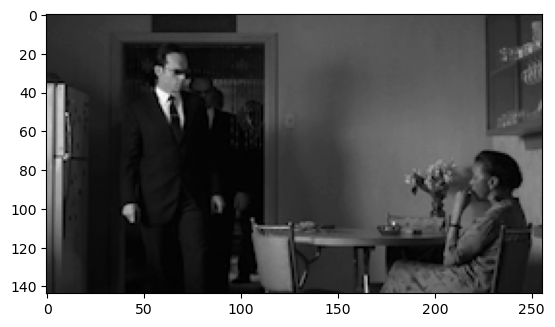

In [37]:
fig, ax = plt.subplots()
ax.imshow(stimulus_arr[12000], cmap='binary_r')